# Loan Default Probability
we use a classification-based machine learning techniques algorithm to predict whether a loan will default. The case study focuses on various techniques and concepts of data processing, feature selection, exploratory analysis, model training and Validation.

The goal of this case study is to build a machine learning model to predict the probability that a loan will default.

The Machine Learning Models

    1. RandomForestClassifier 
    2. KNeighborsClassifier 
    3. SVC 
    4. LogisticRegression 
    5. DecisionTreeClassifier 




In [508]:
#Packages for data loading, data analysis, and data preparation
#importing libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#Packages for model evaluation and classification models
from sklearn.model_selection import train_test_split, KFold,cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval


In [509]:
# load dataset
dataset = pd.read_csv('/home/liban/Downloads/train.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [510]:
# drop loan_ID
dataset.drop('Loan_ID', axis = 1, inplace = True)

# Data Dictionary
There are 13 variables in this data set:
8 categorical variables,
4 continuous variables, and
1 variable to accommodate the loan ID.
The following is the structure of the data set.
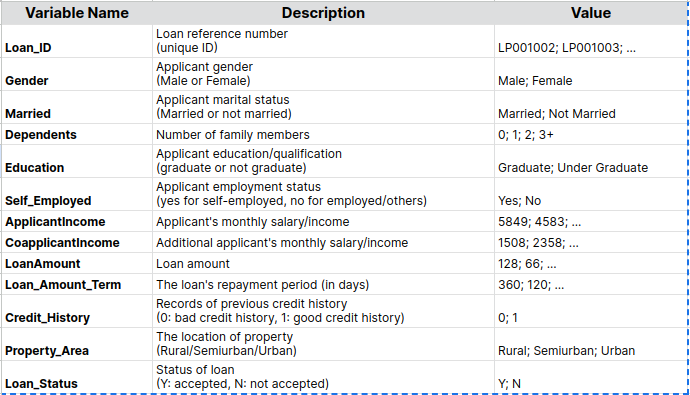


# Exploratory data analysis

In [511]:
print("Check the data shape(rows, columns). it has 614 rows and 12 columns. That’s 12 features.")
dataset.shape

Check the data shape(rows, columns). it has 614 rows and 12 columns. That’s 12 features.


(614, 12)

In [512]:
# Now we check the data types and other information.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


# Feature selection—limit the feature space
The full dataset has 12 features for each loan, but not all features contribute to the prediction variable. 
Removing features of low importance can improve accuracy and reduce both model complexity and overfitting. 
Training time can also be reduced for very large datasets. 

Eliminating features that have more than 30% missing values.

In [513]:
#Feature elimination based on significant missing values
#First, we calculate the percentage of missing data for each feature:
print("This dataset has 12 features and the missing values is less than 30%, so the number of features  remain the same.")
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
print(missing_fractions)
#Drop the missing fraction
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

This dataset has 12 features and the missing values is less than 30%, so the number of features  remain the same.
Credit_History       0.081433
Self_Employed        0.052117
LoanAmount           0.035831
Dependents           0.024430
Loan_Amount_Term     0.022801
Gender               0.021173
Married              0.004886
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


(614, 12)

In [514]:
categorical_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount'] 
print(categorical_columns)
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [515]:
for column in categorical_columns:
    dataset[column].fillna(dataset[column].mode()[0],inplace=True)
for column in numerical_columns:
    dataset[column].fillna(dataset[column].mean(),inplace=True)

In [516]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [517]:
dataset.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [518]:
obj = (dataset.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


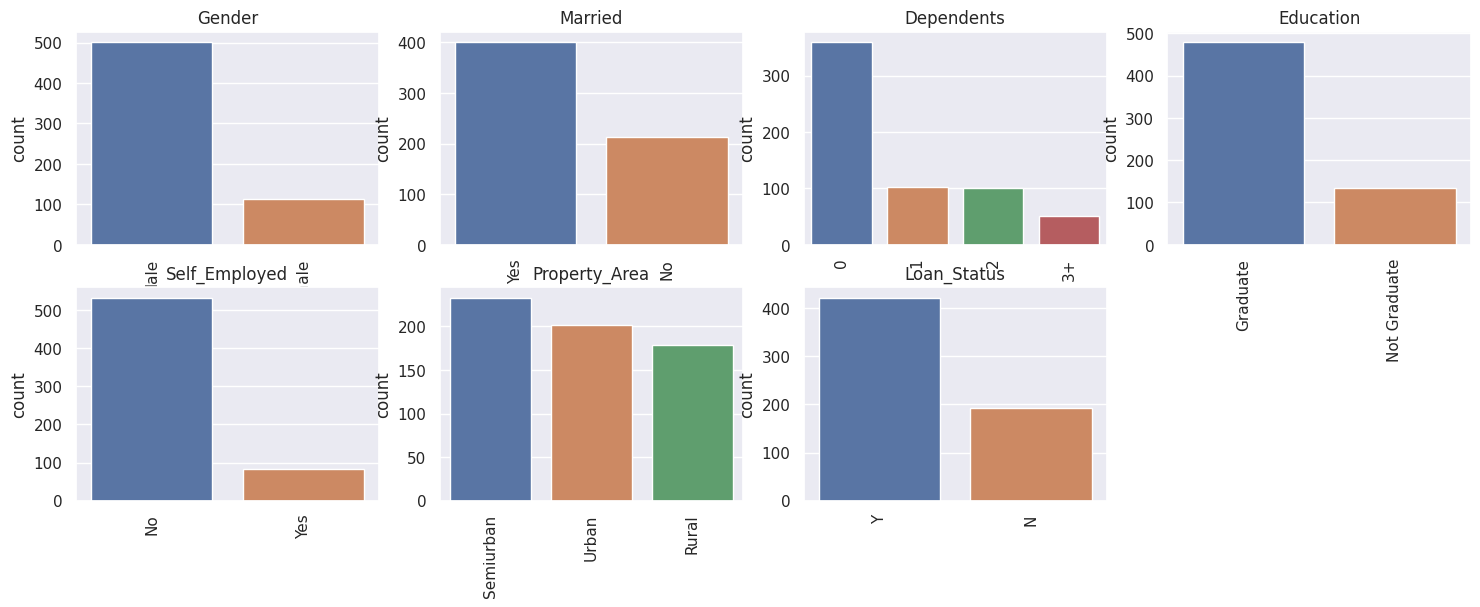

In [519]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1
  
for col in object_cols:
  y = dataset[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y).set(title=col)
  index +=1


In [520]:
print("From the results above, the number of male applicants is higher compared to female applicants.")
print("The number of applicants that has been married is higher compared to applicants that hasn't married.") 
print("The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.")
print("The number of applicants that are not self employed is higher compared to applicants that are self employed.")
print("The number of applicants that have good credit history is higher compared to applicants that have bad credit history.")
print("This column has a balanced distribution between Urban, Rural, and Semiurban property area.")
print("The number of approved loans is higher compared to rejected loans.")

From the results above, the number of male applicants is higher compared to female applicants.
The number of applicants that has been married is higher compared to applicants that hasn't married.
The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.
The number of applicants that are not self employed is higher compared to applicants that are self employed.
The number of applicants that have good credit history is higher compared to applicants that have bad credit history.
This column has a balanced distribution between Urban, Rural, and Semiurban property area.
The number of approved loans is higher compared to rejected loans.


# Other Exploration
This section will show additional exploration from each variables. The additional exploration are:

Bivariate analysis (categorical w/ categorical, categroical w/ numerical, and numerical w/ numerical)

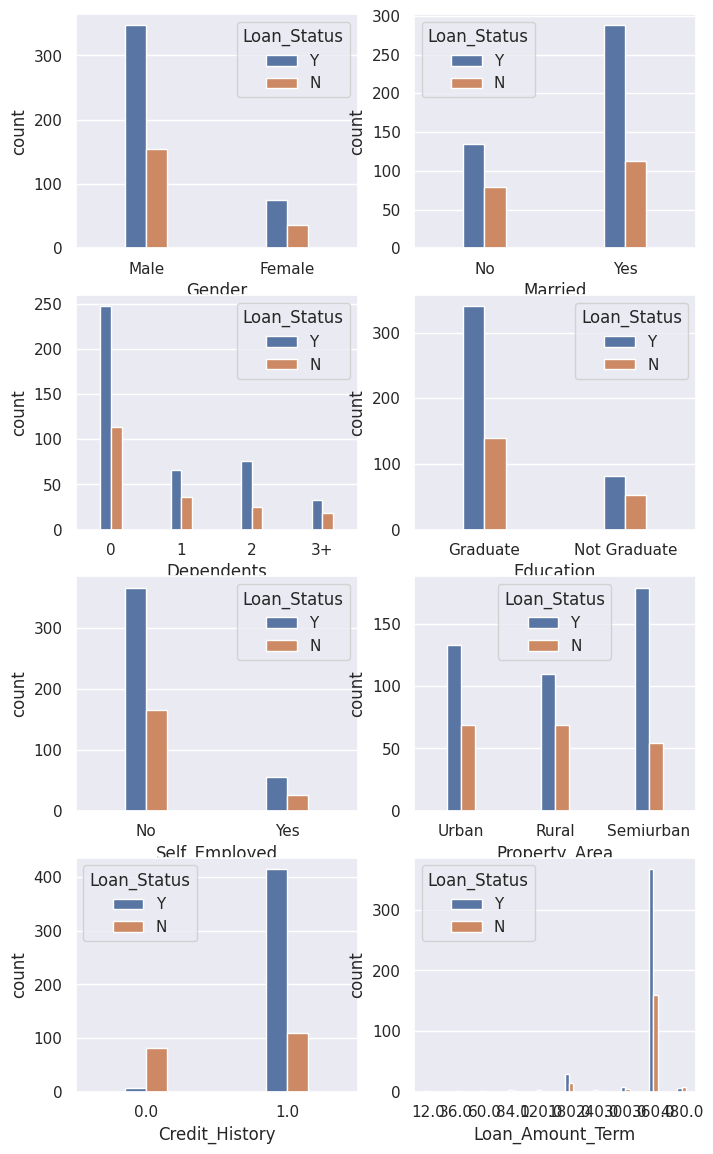

In [521]:
fig,axes=plt.subplots(4,2, figsize=(8,14))
for idx, col in enumerate(categorical_columns):
    row, column=idx//2, idx%2
    sns.countplot(x=col, data=dataset, ax=axes[row, column], hue='Loan_Status', width=0.3)

In [522]:
print("Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.")
print("Most not self employed applicants have good credit compared to self employed applicants")
print("Most of loan that got accepted has property in Semiurban compared to Urban and Rural.")

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.
Most not self employed applicants have good credit compared to self employed applicants
Most of loan that got accepted has property in Semiurban compared to Urban and Rural.


It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed


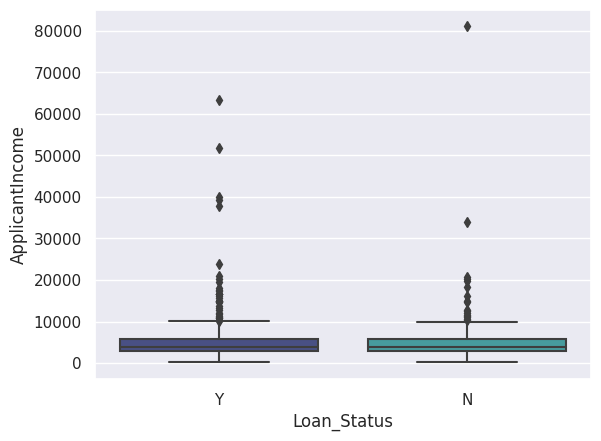

In [523]:
#Categorical - Numerical 
print("It can be seen that there are lots of outliers in Applicant Income, and the distribution also positively skewed")
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=dataset, palette="mako");

It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.


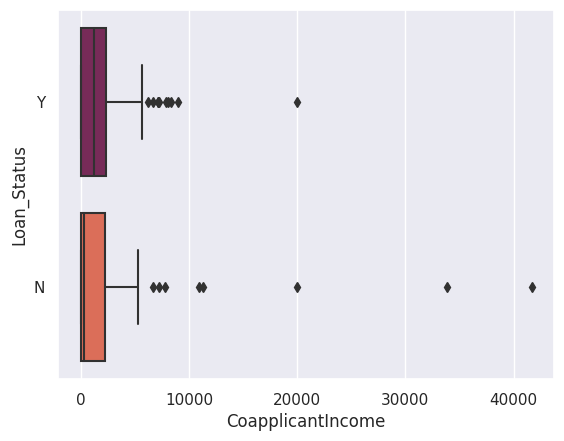

In [524]:
print("It's clear that Co Applicant Income has a number of outliers, and the distribution is also positively skewed.")
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=dataset, palette="rocket");

As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.


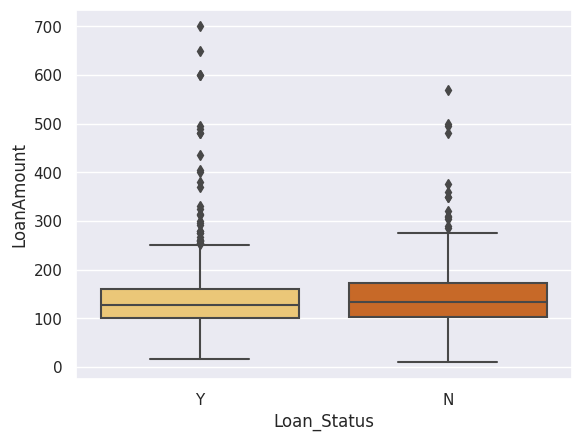

In [525]:
print("As can be seen, Co Applicant Income has a high number of outliers, and the distribution is also positively skewed.")
sns.boxplot(x="Loan_Status", y="LoanAmount", data=dataset, palette="YlOrBr");

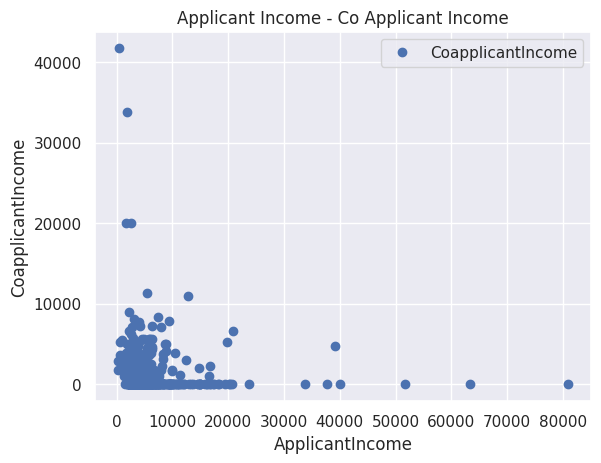

Pearson correlation: -0.11660458122889966
T Test and P value: 
 TtestResult(statistic=13.835753259915665, pvalue=1.460983948423972e-40, df=1226.0)
There is negative correlation between Applicant income and Co Applicant Income.
The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46


In [526]:
#Numerical - Numerical
dataset.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o')  
plt.title('Applicant Income - Co Applicant Income')  
plt.xlabel('ApplicantIncome')
plt.ylabel('CoapplicantIncome')  
plt.show()
print('Pearson correlation:', dataset['ApplicantIncome'].corr(dataset['CoapplicantIncome']))
print('T Test and P value: \n', stats.ttest_ind(dataset['ApplicantIncome'], dataset['CoapplicantIncome']))

print("There is negative correlation between Applicant income and Co Applicant Income.")
print("The correlation coefficient is significant at the 95 per cent confidence interval, as it has a p-value of 1.46")

In [527]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (dataset.dtypes == 'object')
for col in list(obj[obj].index):
  dataset[col] = label_encoder.fit_transform(dataset[col])

There is positive correlation between Loan Amount and Applicant Income. It also shows that Credit_History has a high impact on Loan_Status.


<Axes: >

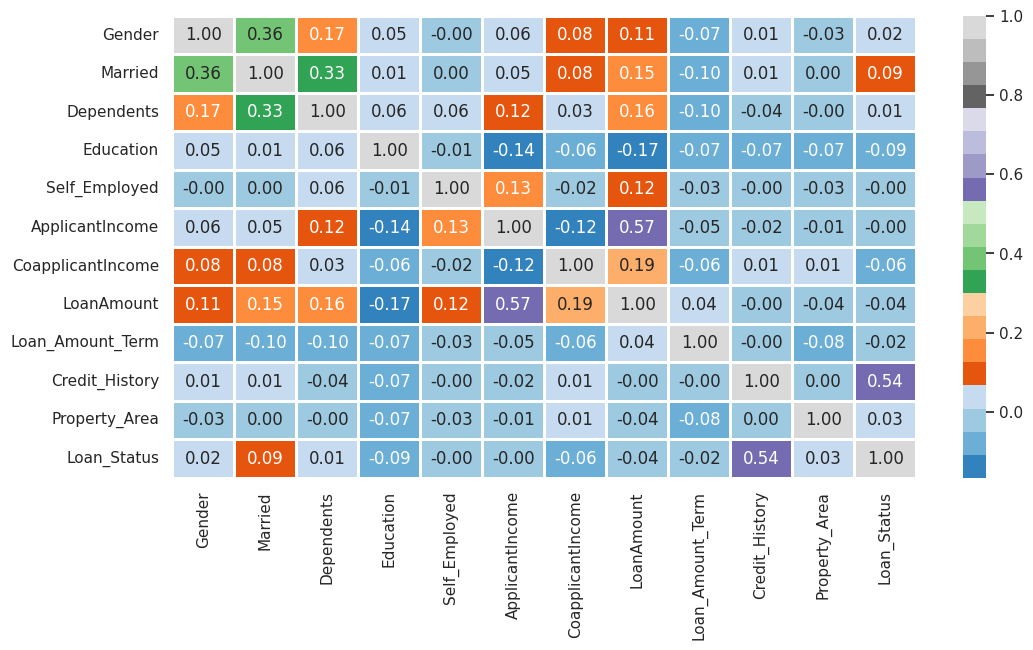

In [528]:
print("There is positive correlation between Loan Amount and Applicant Income. It also shows that Credit_History has a high impact on Loan_Status.")
plt.figure(figsize=(12,6))
  
sns.heatmap(dataset.corr(),cmap='tab20c',fmt='.2f',
            linewidths=2,annot=True)

As can be seen from the results, the 360 days loan duration is the most popular compared to others.


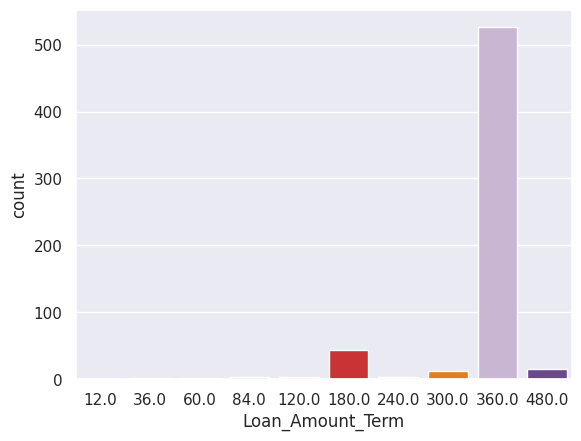

In [529]:
print("As can be seen from the results, the 360 days loan duration is the most popular compared to others.")
sns.countplot(x="Loan_Amount_Term", data=dataset, palette="Paired")
plt.show()

In [530]:
# Numerical Variable/Describe Numerical Variable [This section will show mean, count, std, min, max and others using describe function.]
dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,84.037468
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.250000
50%,3812.500000,1188.500000,129.000000
75%,5795.000000,2297.250000,164.750000
max,81000.000000,41667.000000,700.000000


# Distribution of Numerical Variable 
In this section, I will show the distribution of numerical variable using histogram and violin plot.

# Histogram Distribution



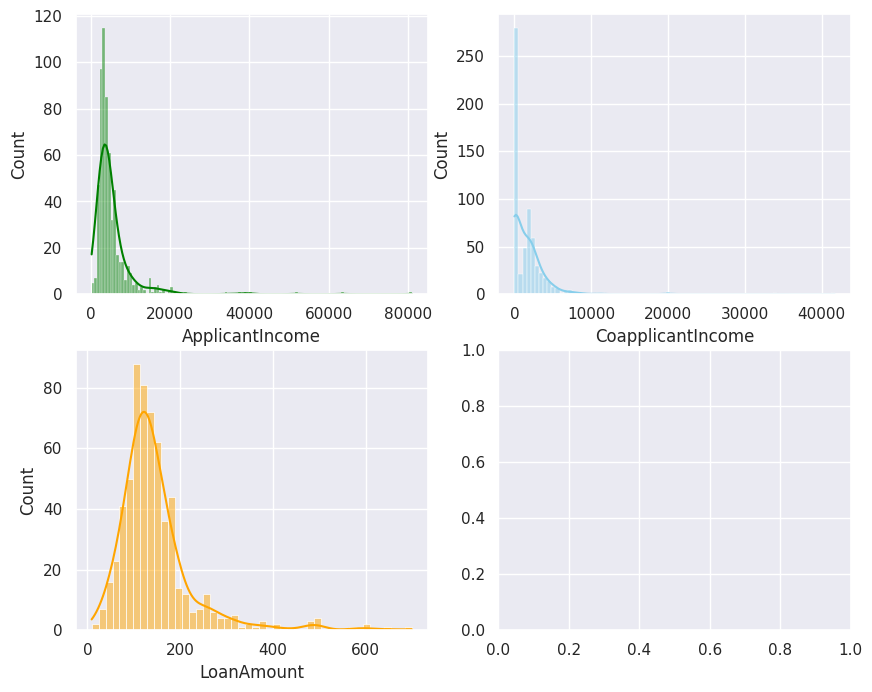

In [531]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [532]:
print("The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from histogram.")

The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers (can be seen from histogram.


# Remove Outliers & Infinite values
Since there are outliers, the outliers will be removed.

In [533]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1

dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(207, 12)

# Skewed Distribution Treatment 
In previous section, it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
I will use square root transformation to normalized the distribution.

In [534]:
# Square Root Transformation

dataset.ApplicantIncome = np.sqrt(dataset.ApplicantIncome)
dataset.CoapplicantIncome = np.sqrt(dataset.CoapplicantIncome)
dataset.LoanAmount = np.sqrt(dataset.LoanAmount)

/tmp/ipykernel_30241/2388019110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.ApplicantIncome = np.sqrt(dataset.ApplicantIncome)
/tmp/ipykernel_30241/2388019110.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.CoapplicantIncome = np.sqrt(dataset.CoapplicantIncome)
/tmp/ipykernel_30241/2388019110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

As can be seen, the distribution after using log transformation are much better compared to original distribution.


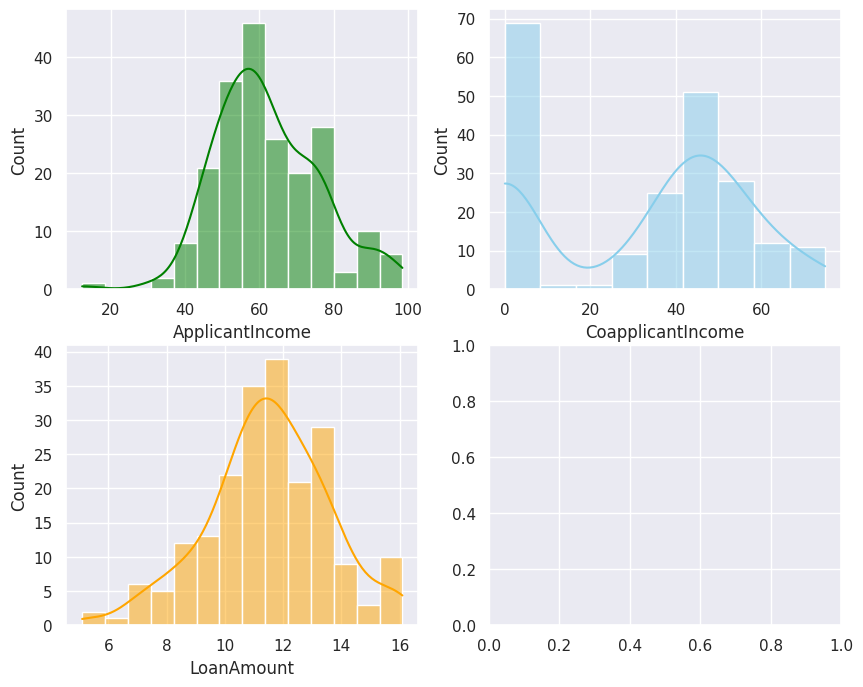

In [535]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=dataset, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=dataset, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=dataset, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

print("As can be seen, the distribution after using log transformation are much better compared to original distribution.")

In [536]:
#Features Separating
#Dependent features (Loan_Status) will be seperated from independent features.
X=dataset.drop(["Loan_Status"],axis=1)
y=dataset["Loan_Status"]

# SMOTE Technique
In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

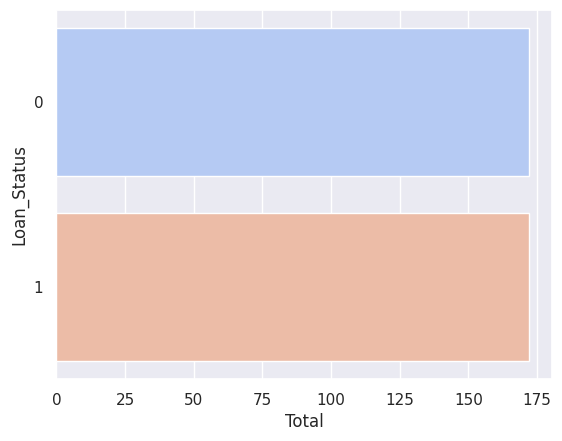

As can be seen, the distrubtion of Loan status are now balanced.


In [538]:
X, y =SMOTE().fit_resample(X,y)
 
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=dataset, palette="coolwarm")
plt.ylabel('Loan_Status')
plt.xlabel('Total')
plt.show()

print("As can be seen, the distrubtion of Loan status are now balanced.")

# Data Normalization
In this section, data normalization will be performed to normalize the range of independent variables or features of data.

In [539]:
X = MinMaxScaler().fit_transform(X)

# Splitting Data Set 
The data set will be split into 80% train and 20% test.

In [540]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [564]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=5)
rfc = RandomForestClassifier(n_estimators = 7,criterion = 'entropy',random_state =7)
svc = SVC(kernel='rbf', max_iter=300)
lc = LogisticRegression(solver='saga', max_iter=1000, random_state=1)
dt=DecisionTreeClassifier(max_leaf_nodes= 15)

# making predictions on the training set
for clf in (rfc, knn, svc,lc,dt):
    clf.fit(X_train, y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train, 
                                         Y_pred))

Accuracy score of  RandomForestClassifier = 98.18181818181819
Accuracy score of  KNeighborsClassifier = 79.63636363636364
Accuracy score of  SVC = 65.45454545454545
Accuracy score of  LogisticRegression = 63.63636363636363
Accuracy score of  DecisionTreeClassifier = 80.36363636363636


In [565]:
 #making predictions on the testing set
for clf in (rfc, knn, svc,lc,dt):
    clf.fit(X_test, y_test)
    Y_pred_test = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_test, 
                                         Y_pred_test))


print("Random Forest Classifier is giving the best accuracy with an accuracy score of 97% for the testing dataset.")

Accuracy score of  RandomForestClassifier = 97.10144927536231
Accuracy score of  KNeighborsClassifier = 63.76811594202898
Accuracy score of  SVC = 66.66666666666666
Accuracy score of  LogisticRegression = 65.21739130434783
Accuracy score of  DecisionTreeClassifier = 94.20289855072464
Random Forest Classifier is giving the best accuracy with an accuracy score of 97% for the testing dataset.


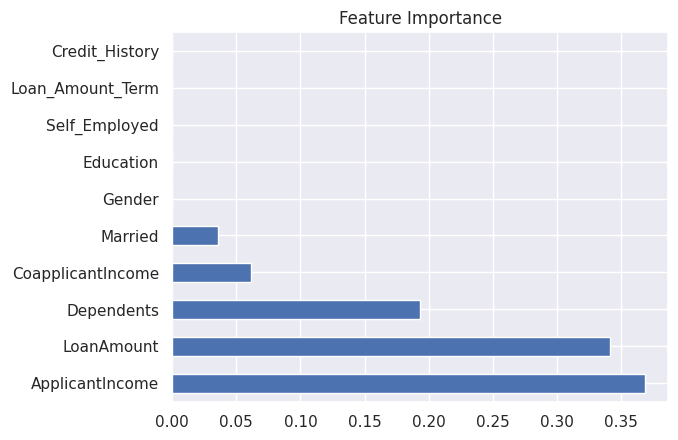

The results of the model shows/display the variable importance of our trained model.The applicant Income seems to be the most important feature, followed by Loan Amount and Dependents


In [568]:
#print(clf.feature_importances_) #use inbuilt class feature_importances
X_columns = dataset.drop(["Loan_Status"],axis=1)
feat_importances = pd.Series(clf.feature_importances_, index=X_columns.columns)
#plot graph of feature importances for better visualization
feat_importances.nlargest(10).plot(kind='barh', title='Feature Importance')
pyplot.show()

print("The results of the model shows/display the variable importance of our trained model.The applicant Income seems to be the most important feature, followed by Loan Amount and Dependents")

# Results on the test dataset

In [577]:
y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred ))
print(confusion_matrix(y_test, y_pred ))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred ,y_test)
print('Random Forest accuracy: {:.2f}%'.format(GBAcc*100))


print("Confusion matrix: Looking at the confusion matrix and the overall result of the test set, both the rate of false positives and the rate of false negatives are lower; the overall model performance looks good and is in line with the training set results.")

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.97      0.97      0.97        34

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69

[[34  1]
 [ 1 33]]
Random Forest accuracy: 97.10%
Confusion matrix: Looking at the confusion matrix and the overall result of the test set, both the rate of false positives and the rate of false negatives are lower; the overall model performance looks good and is in line with the training set results.


# Mis-classifications
 
The model correctly predicted 34 as defaulting on the loan (TP) and incorrectly predicted 1 as repaying the loan, but which actually defaulted (FN). The model also incorrectly predicted 1 as defaulting on the loan, but which actually repaid(FP) and correctly predicted 33 as repaying the loan(TN).

# Next Steps

Section Goals

1.Read in the new dataset with unknown loan status information and process through previously created pipeline

2.Make predictions on the new dataset

3.Use predictions to make recommendations about which loan application to approve or reject 